<center> <font size = '8', color = 'green'> Predicting Medical insurance charges

<font size='4'>In this code we are going to use different features to predict the  health insurance premium . 

Here are the feature that we are going to use
​
* **age:** age of primary beneficiary
​
* **sex:** insurance contractor gender, female, male
​
* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
​
* **children:** Number of children covered by health insurance / Number of dependents
​
* **smoker:** Smoking
​
* **region:** the beneficiary's residential area , northeast, southeast, southwest, northwest

<font size='6'><center>Starting of the notebook</center>


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# read the dataset
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# check for summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

we have no null values in the dataset

## exploratory data analytics

### univariate analysis

In [6]:
# function to plot the distribution of a variable
def plot_distribution(data, feature,K=kde=True):
    """
    Plot the distribution of a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to plot.

    Returns:
    None
    """
    plt.figure(figsize=(8,5))
    plt.title("Distribution of %s" % feature)
    sns.histplot(data[feature].dropna(), kde=kde, bins=100)
    plt.show()

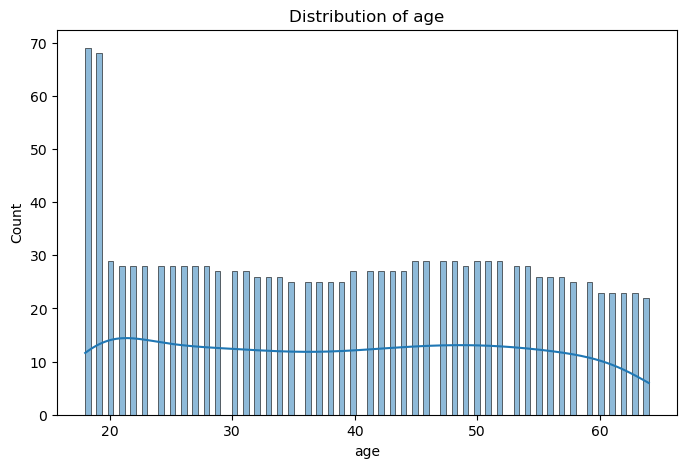

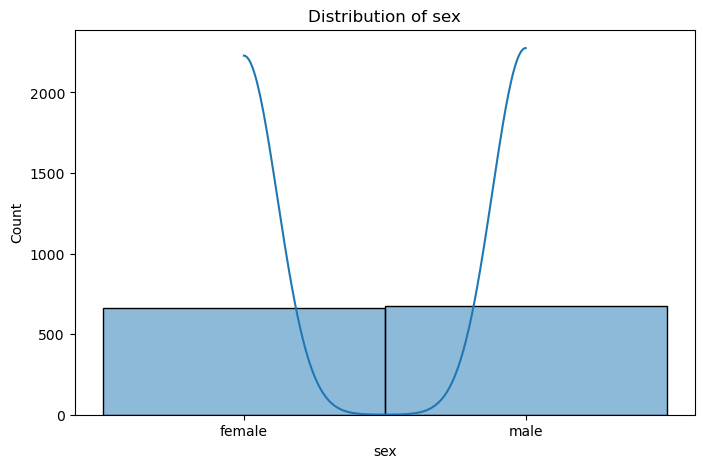

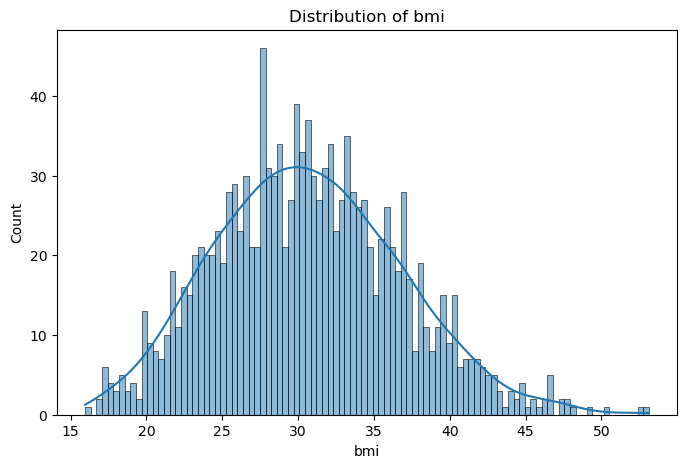

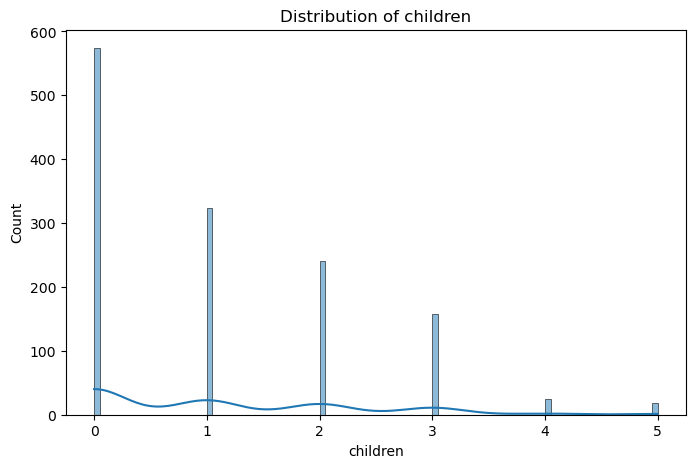

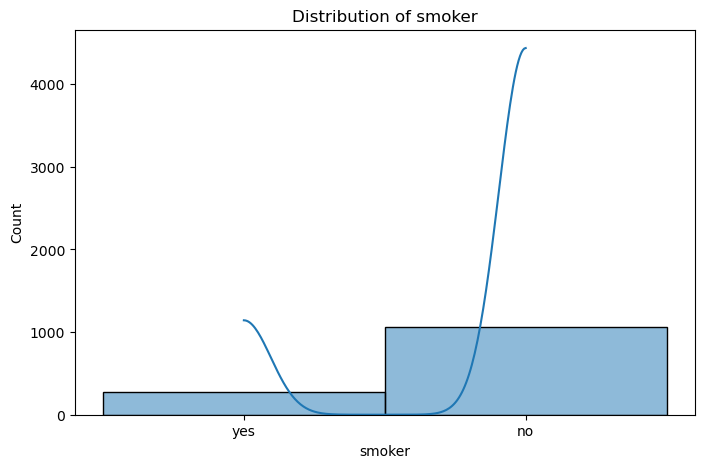

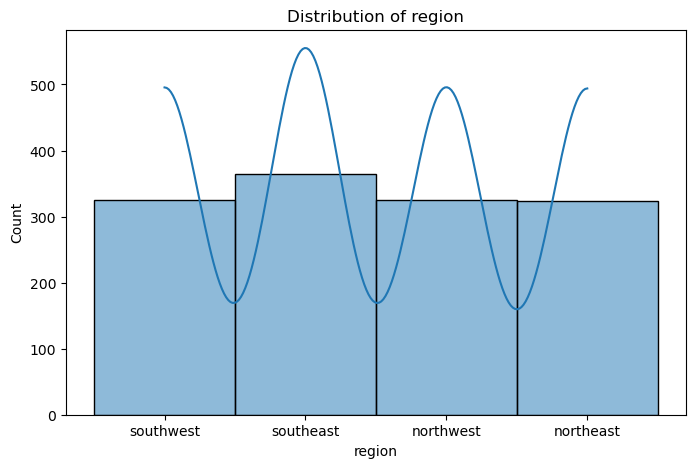

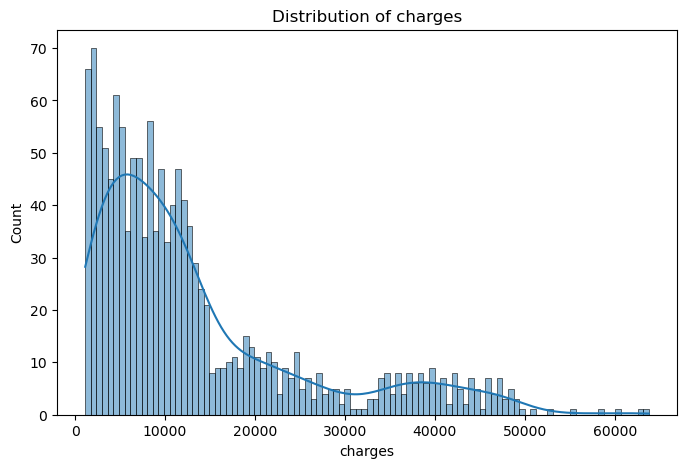

In [7]:
# plot distribution of all features
for feature in df.columns:
    plot_distribution(df, feature)

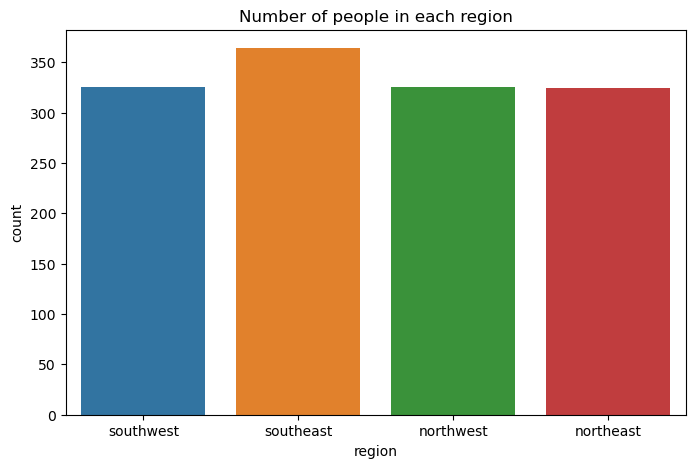

In [8]:
# plot a table showing number of people in each region
plt.figure(figsize=(8,5))
sns.countplot(x='region', data=df)
plt.title('Number of people in each region')
plt.show()

The number of people in each region is almost the same

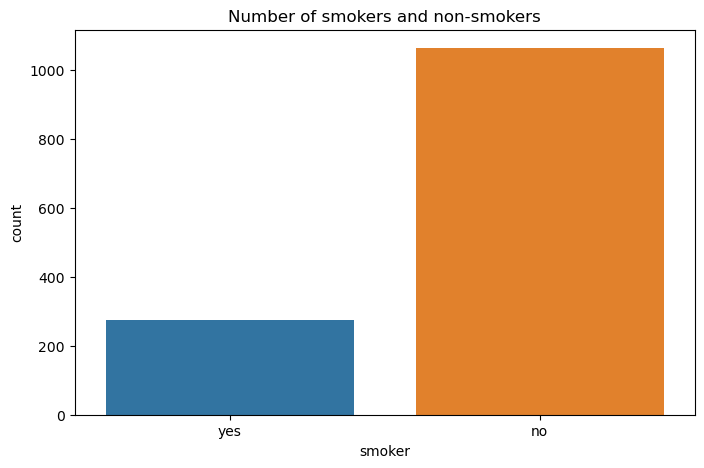

In [9]:
# plot a table showing number of smokers and non-smokers
plt.figure(figsize=(8,5))
sns.countplot(x='smoker', data=df)
plt.title('Number of smokers and non-smokers')
plt.show()


The number of non-smokers is significantly higher than the number of smokers.

### Bi-variate Analysis

In [10]:
# a function which check effects of a feature on the target variable
def feature_effect(data, feature):
    """
    Check the effect of a given feature on the target variable.

    Parameters:
    data (pandas.DataFrame): The data containing the features.
    feature (str): The name of the feature to check.

    Returns:
    None
    """
    plt.figure(figsize=(8,5))
    sns.barplot(x=feature, y='charges', data=data)
    plt.title("Effect of %s on charges" % feature)
    plt.show()


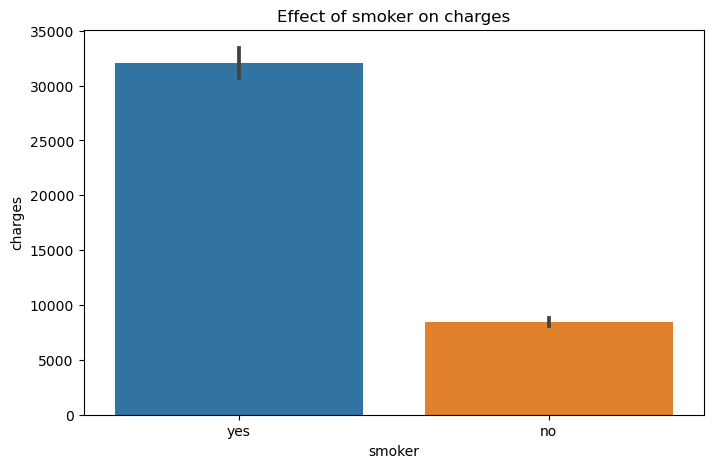

In [11]:
# check the effect of smoker on charges
feature_effect(df, 'smoker')

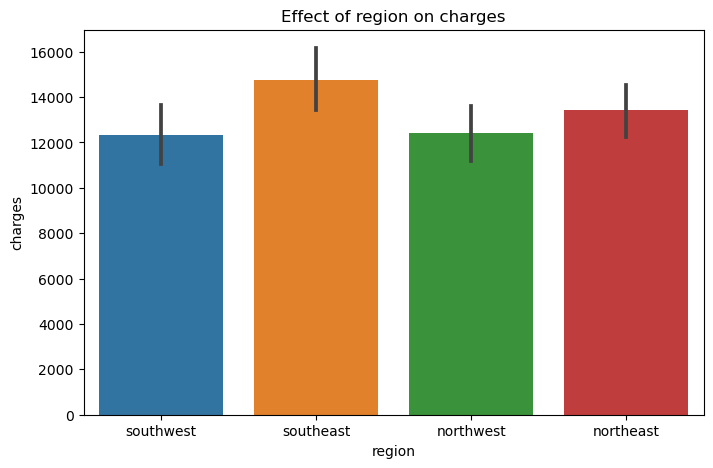

In [12]:
# check the effect of region on charges
feature_effect(df, 'region')

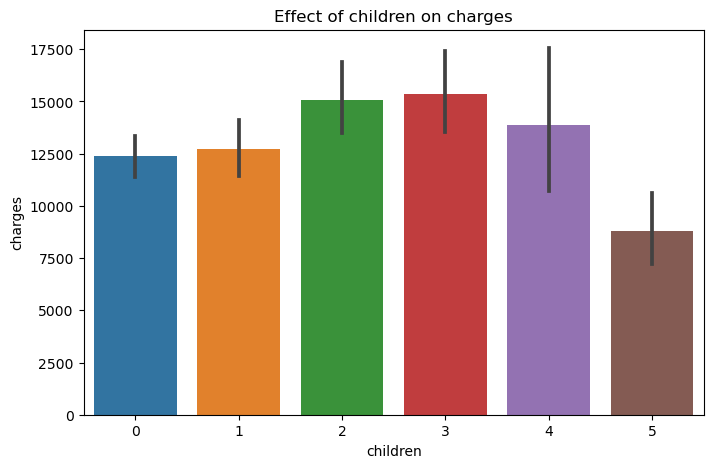

In [13]:
# check the of children on charges
feature_effect(df, 'children')

<Figure size 800x500 with 0 Axes>

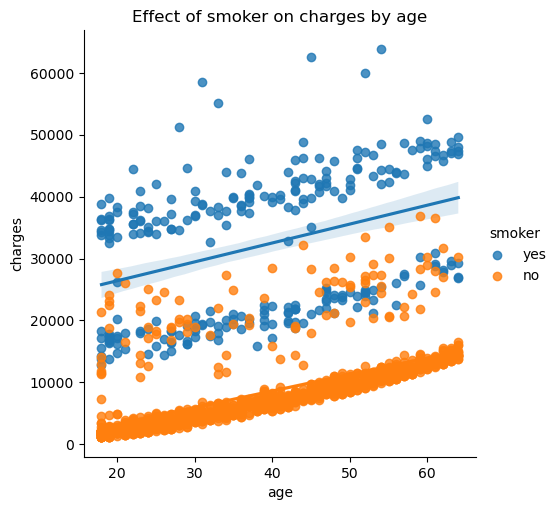

In [14]:
# check the effect of smoker on charges by age
plt.figure(figsize=(8,5))
sns.lmplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Effect of smoker on charges by age')
plt.show()

<Figure size 800x500 with 0 Axes>

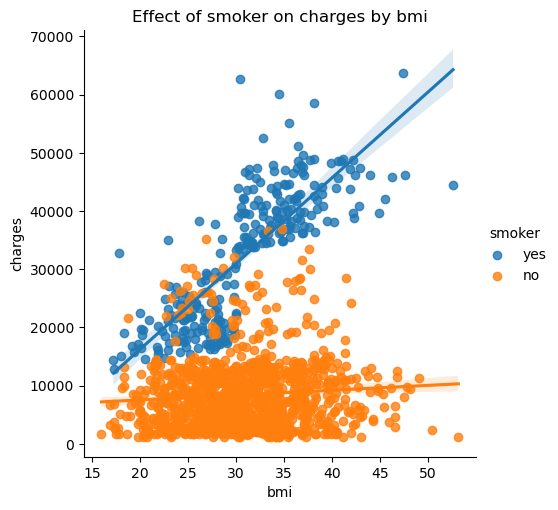

In [15]:
# check effect of bmi on charges by smoker
plt.figure(figsize=(8,5))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Effect of smoker on charges by bmi')
plt.show()

 From the above plots, we can see that the smoker feature has a high significant effect on the charges. If someone smokes, the charges are significantly higher than if they do not smoke.
 We can also see that the region feature has a slight effect on the charges.
The number of children does not have a significant effect on the charges.
 The age feature has a significant effect on the charges. As the age increases, the charges also increase.
The bmi feature has a slight effect on the charges. As the bmi increases, the charges also increase.


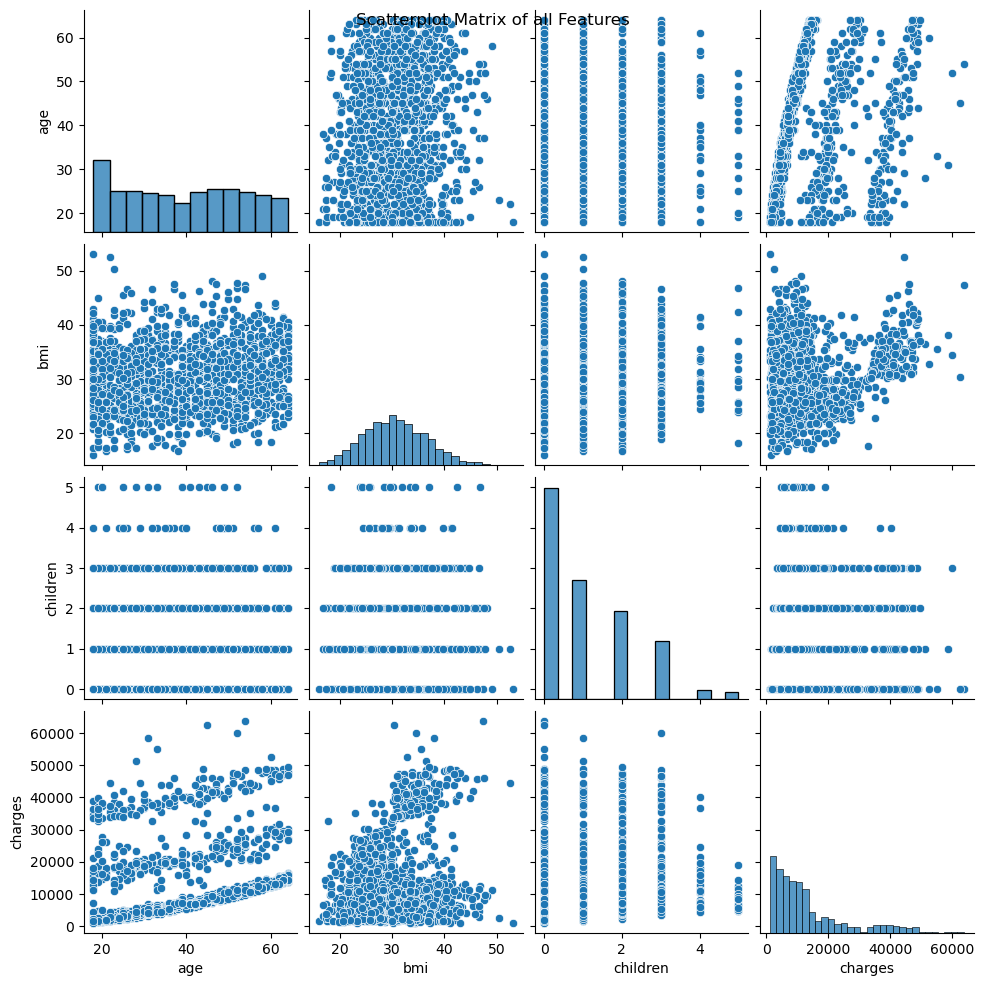

In [16]:
# Visualize the relationship among all features using a scatterplot matrix
sns.pairplot(df)
plt.suptitle("Scatterplot Matrix of all Features")
plt.show()

## Feature engineering

In [17]:
# function that uses skliearrn to do label encoding
def label_encode(data, feature):
    """
    Label encode a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to encode.

    Returns:
    data (pandas.DataFrame): The data with the feature label encoded.
    label_encoder (sklearn.preprocessing.LabelEncoder): The label encoder used.
    """
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])
    return data, label_encoder


In [18]:
# label encode the categorical features
df, label_encoder_1 = label_encode(df, 'sex')
df, label_encoder_2 = label_encode(df, 'smoker')
df, label_encoder_3 = label_encode(df, 'region')
label_encoder_1.classes_, label_encoder_2.classes_, label_encoder_3.classes_

(array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object))

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


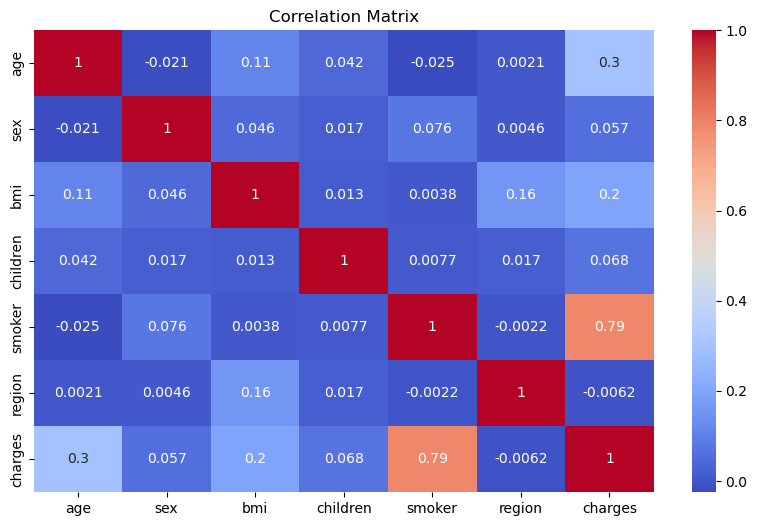

In [20]:
# plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<font size = '4'> From the above heatmap, we can see that the smoker feature has the highest correlation with the charges feature.
The age feature also has a significant correlation with the charges feature,followed by the BMI


In [21]:
# define a function that do one hot encoding
def one_hot_encode(data, feature):
    """
    One hot encode a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to encode.

    Returns:
    data (pandas.DataFrame): The data with the feature one hot encoded.
    """
    data = pd.get_dummies(data, columns=[feature], drop_first=True)
    return data


## Build the model

In [22]:
# define a function to extract features and target variable
def extract_features_target(data, target_feature):
    """
    Extract the features and target variable from the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the features and target variable.
    target_feature (str): The name of the target variable.

    Returns:
    X (pandas.DataFrame): The features.
    y (pandas.Series): The target variable.
    """
    X = data.drop(target_feature, axis=1)
    y = data[target_feature]
    return X, y

In [23]:
# define a function  that does linear regression using cross validation with kfold and return the R2 ,RMSE and MAPE

def linear_regression_cv(X, y, n_splits=5, model=LinearRegression()):
   
    # initialize the model
    model = model
    
    # initialize the KFold object
    kf = KFold(n_splits=n_splits)
    
    # perform cross validation
    scores= cross_val_score(model, X, y, scoring='r2', cv=kf)
    rmse= np.abs(cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf))
    mape= np.abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=kf))

    
    return scores.mean(), rmse.mean(), mape.mean()*100

<center> <font size = '6'> The following are the metrics that I using </center> </font size >

1. **R-squared (R²)**: This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It ranges from 0 to 1, where 1 indicates that the independent variables perfectly predict the dependent variable, and 0 indicates that the model does not explain any of the variability of the response data around its mean. It is also known as the coefficient of determination.

2. **Root Mean Square Error (RMSE)**: This is a frequently used measure of the differences between values predicted by a model and the values actually observed. It's the square root of the average of squared differences between prediction and actual observation. The smaller the RMSE, the better the model's performance. However, RMSE alone is scale-dependent and should be considered with other metrics.

3. **Mean Absolute Percentage Error (MAPE)**: This is a measure of prediction accuracy of a forecasting method in statistics. It expresses accuracy as a percentage, and is defined by the formula: 

$$\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{A_i - F_i}{A_i} \right|$$ 

where $A_i$ is the actual value and $F_i$ is the forecasted value. The difference between $A_i$ and $F_i$ is divided by the actual value $A_i$. The absolute value in this calculation is summed for every forecasted point in time and divided by the number of fitted points $n$. The result is then expressed as percentages. Lower values of MAPE mean higher accuracy of the model.


In [24]:
# get the features and target variable
X,y = extract_features_target(df, 'charges')

In [25]:
# perform linear regression using cross validation
r2_1, rmse_1, mape_1= linear_regression_cv(X, y)
print( "Without standadization and one hot encoding, The results are as follows:")
print("R2: %.2f" % r2_1)  
print("RMSE: %.2f" % rmse_1)
print("MAPE: {:.2f} %".format(mape_1))

Without standadization and one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6068.38
MAPE: 42.57 %


### standardize the data

In [26]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['age', 'bmi']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi']) 
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']


In [27]:
# perform linear regression using cross validation on the standardized data
r2, rmse, mape = linear_regression_cv(X_scaled, y)
print( "With standadization and without one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

With standadization and without one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6064.83
MAPE: 42.59 %


### One hot encoding

In [28]:
# do one hot encoding
df_encoded = one_hot_encode(df, 'region')
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [29]:
# get the features and target variable
X_encoded, y = extract_features_target(df_encoded, 'charges')
assert len(X_encoded) == len(y)

In [30]:
# With standadization and one hot encoding, perform linear regression using cross validation
r2, rmse, mape = linear_regression_cv(X_encoded, y)
print( "With one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))



With one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6072.41
MAPE: 42.42 %


<font size= 4>From the above results, on all the three cases, the R2 value is the same but the RMSE is the smallest when we use standadization.

## Feature Engineering

In [31]:
# add non-linear features using age
df['age_squared'] = df['age']**2

In [32]:
# get the features and target variable
X, y = extract_features_target(df, 'charges')

In [33]:
# perform linear regression using cross validation
r2_2, rmse_2, mape_2= linear_regression_cv(X, y)
print( "After adding non linear features, The results are as follows:")
print("R2: %.2f" % r2_2)  
print("RMSE: %.2f" % rmse_2)
print("MAPE: {:.2f} %".format(mape_2))


After adding non linear features, The results are as follows:
R2: 0.75
RMSE: 6038.86
MAPE: 42.47 %


In [34]:
# standize the data after adding non-linear features
X_scaled = scaler.fit_transform(X[['age', 'bmi', 'age_squared']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi', 'age_squared'])
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']


In [35]:
# perform linear regression using cross validation on the standardized data
r2, rmse, mape = linear_regression_cv(X_scaled, y)
print( "After adding non linear features and standadization, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

After adding non linear features and standadization, The results are as follows:
R2: 0.75
RMSE: 6034.38
MAPE: 42.50 %


In [36]:
# do one hot encoding
df_encoded = one_hot_encode(df, 'region')
df_encoded['age_squared'] = df['age']**2


In [37]:
# get the features and target variable
X_encoded, y = extract_features_target(df_encoded, 'charges')

In [38]:
# With one hot encoding, perform linear regression using cross validation
r2, rmse ,mape= linear_regression_cv(X_encoded, y)
print( "After adding non linear features and one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))


After adding non linear features and one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6042.28
MAPE: 42.30 %


After adding non-linear features and using standardization, we still have the same R2 but the RMSE has decreased to 6034 and the MAPE has slightly decreased. This means that the model is performing better in terms of RMSE and MAPE

In [39]:
# crete a feature that shows if a person is a smoker and has a bmi greater than 30
df['smoker_obese']= (df['smoker']==1) & (df['bmi']>30)
df['smoker_obese'] = df['smoker_obese'].astype(int)

# show me the cont of the new feature
df['smoker_obese'].value_counts()

0    1194
1     144
Name: smoker_obese, dtype: int64

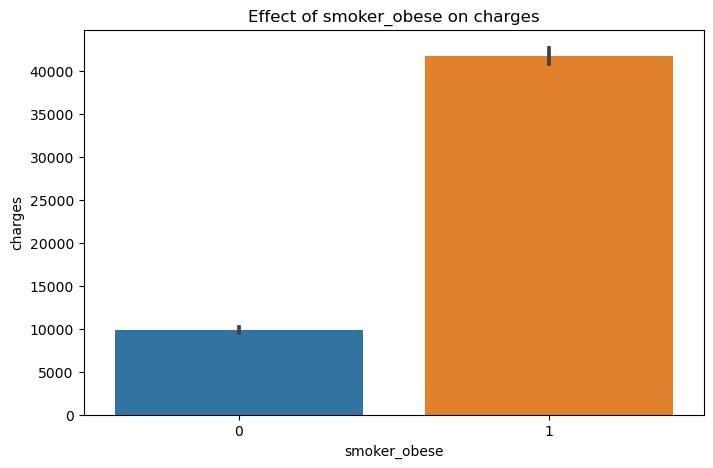

In [40]:
# plot the effect of the new feature on charges
feature_effect(df, 'smoker_obese')

In [41]:
# print the correlation of smoker_obese with charges
print("Correlation of smoker_obese with charges: %.2f" % df['smoker_obese'].corr(df['charges']))

Correlation of smoker_obese with charges: 0.82


<font size = 4> From the corelation coefficient, we can see that the new feature has a higher correlation with charges than the original smoker feature

In [42]:
# add obese(bmi>30) feature
df['obese'] = df['bmi']>30
df['obese'] = df['obese'].astype(int)

In [43]:
# get the features and target variable
X, y = extract_features_target(df, 'charges')

In [44]:
# perform linear regression using cross validation with the new features
r2_3, rmse_3, mape_3= linear_regression_cv(X, y)
print( "After adding the new feature and the non linear feature, The results are as follows:")
print("R2: %.2f" % r2_3)
print("RMSE: %.2f" % rmse_3)
print("MAPE: {:.2f} %".format(mape_3))


After adding the new feature and the non linear feature, The results are as follows:
R2: 0.86
RMSE: 4412.16
MAPE: 27.37 %


In [45]:
# standize the data after adding non-linear feature and the new feature
X_scaled = scaler.fit_transform(X[['age', 'bmi', 'age_squared', 'smoker_obese']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi', 'age_squared', 'smoker_obese'])
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']

In [46]:
# perform linear regression using cross validation on the standardized data
r2, rmse, mape = linear_regression_cv(X_scaled, y)
print( "After adding the new feature and the non linear feature and standadization, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

After adding the new feature and the non linear feature and standadization, The results are as follows:
R2: 0.86
RMSE: 4424.60
MAPE: 27.81 %


In [47]:
# do one hot encoding
df_encoded = one_hot_encode(df, 'region')
df_encoded['age_squared'] = df['age']**2
df_encoded['smoker_obese'] = df['smoker_obese']


In [48]:
# get the features and target variable
X_encoded, y = extract_features_target(df_encoded, 'charges')

In [49]:
# With one hot encoding, perform linear regression using cross validation
r2, rmse , mape= linear_regression_cv(X_encoded, y)
print( "After adding the new feature and the non linear feature and one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

After adding the new feature and the non linear feature and one hot encoding, The results are as follows:
R2: 0.86
RMSE: 4419.11
MAPE: 27.30 %


From the above results, we can see that the best model is the one with the new feature and the non-linear feature. It has the highest R2 and  the lowest RMSE and MAPE. The R2 is 0.86 ,the RMSE is 4412 and the mape 27.8 %. This means that the model can explain 86% of the variance in the target variable and the average error is 4412.6. Based on the MAPE we can say that the model is 77.2% accurate

## Regularization with Ridge and Lasso Regression

In [50]:
# get the features and target variable
X, y = extract_features_target(df, 'charges')

In [51]:
# standide the data
X_scaled = scaler.fit_transform(X[['age', 'bmi','age_squared']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi','age_squared']) 
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']
X_scaled['smoker_obese'] = df['smoker_obese']
X_scaled['obese'] = df['obese']

In [52]:
Ridge_model = Ridge(alpha=0.5)
r2_4, rmse_4 , mape_4= linear_regression_cv(X_scaled, y, model=Ridge_model)
print( "Using ridge model, The results are as follows:")
print("R2: %.2f" % r2_4)
print("RMSE: %.2f" % rmse_4)
print("MAPE: {:.2f} %".format(mape_4))


Using ridge model, The results are as follows:
R2: 0.86
RMSE: 4415.98
MAPE: 27.79 %


In [53]:
Laso_model = Lasso(alpha=0.0001)
r2_5, rmse_5, mape_5 = linear_regression_cv(X_scaled, y, model=Laso_model)
print( "Using Lasso model, The results are as follows:")
print("R2: %.2f" % r2_5)
print("RMSE: %.2f" % rmse_5)
print("MAPE: {:.2f} %".format(mape-5))

Using Lasso model, The results are as follows:
R2: 0.86
RMSE: 4415.71
MAPE: 22.30 %


Text(0.5, 1.0, 'Effect of Alpha on Rmse using Lasso')

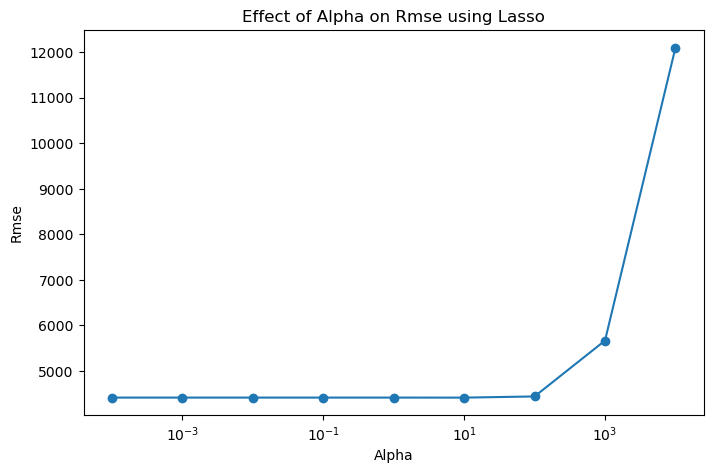

In [54]:
# tune the hyperparameters of the lasse model
alphas = np.logspace(-4, 4, 9)
scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    r2, rmse,mape = linear_regression_cv(X_scaled, y, model=model)
    scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Rmse')
plt.title('Effect of Alpha on Rmse using Lasso')

In [55]:
# print the best alpha and the score of the best alpha
best_alpha = alphas[np.argmin(scores)]
print("Best alpha: %.6f" % best_alpha)
print("Best Rmse: %.2f" % np.min(scores))

Best alpha: 10.000000
Best Rmse: 4414.89


Text(0.5, 1.0, 'Effect of Alpha on Rmse using Ridge')

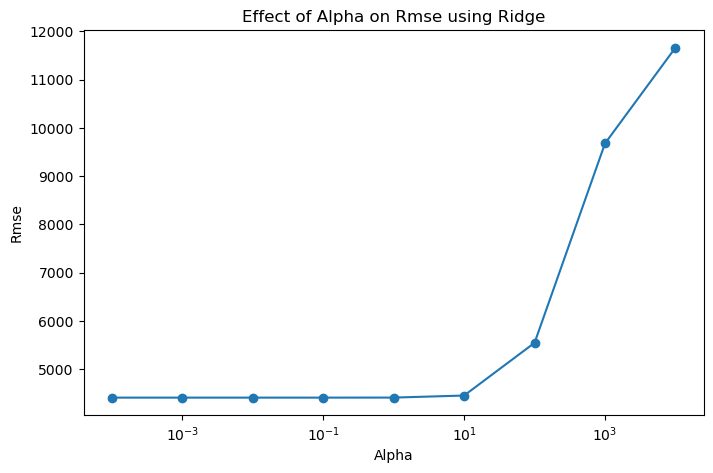

In [56]:
# tune the hyperparameters of the ridge model
alphas = np.logspace(-4, 4, 9)
scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    r2, rmse , mape= linear_regression_cv(X_scaled, y, model=model)
    scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Rmse')
plt.title('Effect of Alpha on Rmse using Ridge')

In [57]:
# print the best alpha and the score of the best alpha
best_alpha = alphas[np.argmin(scores)]
print("Best alpha: %.4f" % best_alpha)
print("Best Rmse: %.2f" % np.min(scores))

Best alpha: 0.0001
Best Rmse: 4415.71


From the above resuls, we can see that the ridge and lasso models are not performing well compared to the linear regression model.

In [58]:
def forward_regression(X, y, threshold_in, verbose=False):
    """
    Perform forward feature selection for linear regression.

    Parameters:
    X (pandas.DataFrame): The features.
    y (pandas.Series): The target variable.
    threshold_in (float): The p-value threshold for adding a feature.
    verbose (bool): Whether to print the results of each iteration.

    Returns:
    included (list): The list of included features.
    """
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [59]:
# get the features and target variable
X, y = extract_features_target(df, 'charges')

In [60]:
# perform forward feature selection
included = forward_regression(X, y, 0.05, verbose=False)
print("The selected features are:")
print(included)

The selected features are:
['smoker_obese', 'smoker', 'age_squared', 'children', 'region', 'bmi', 'obese']


In [61]:
# Use the selected features to perform linear regression using cross validation
X_selected = X[included]
r2, rmse, mape = linear_regression_cv(X_selected, y)
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

R2: 0.86
RMSE: 4413.64
MAPE: 27.53 %


In [62]:
# use selected features and ridge model to perform linear regression using cross validation
Ridge_model = Ridge(alpha=0.001)
r2, rmse, mape = linear_regression_cv(X_selected, y, model=Ridge_model)
print("Using ridge model, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

Using ridge model, The results are as follows:
R2: 0.86
RMSE: 4413.64
MAPE: 27.53 %


In [63]:
# use selected features and lasso model to perform linear regression using cross validation
Lasso_model = Lasso(alpha=0.001)
r2, rmse, mape = linear_regression_cv(X_selected, y, model=Lasso_model)
print("Using Lasso model, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)
print("MAPE: {:.2f} %".format(mape))

Using Lasso model, The results are as follows:
R2: 0.86
RMSE: 4413.64
MAPE: 27.53 %


<font size = 5>From the above results we can see that the feature selection didn't improve the model performance.

## Ploting the models results

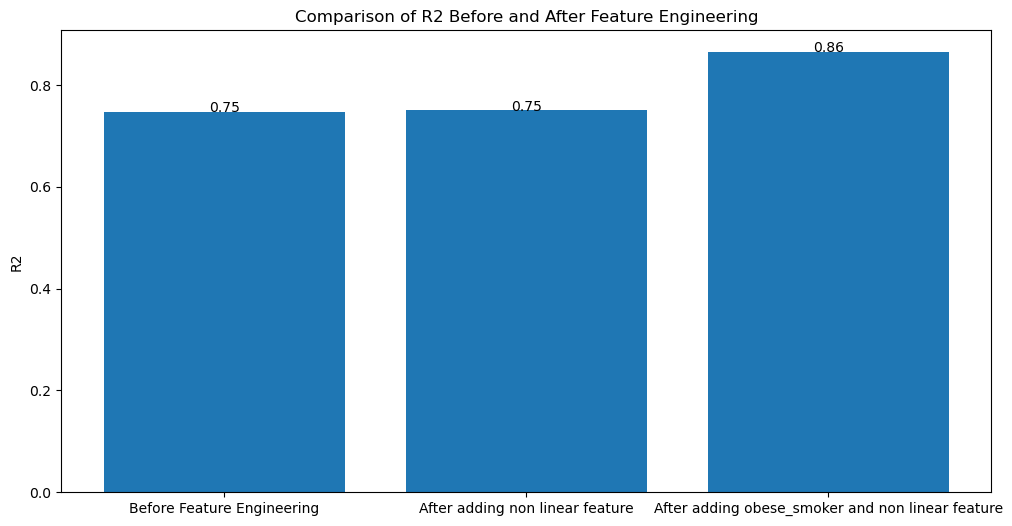

In [64]:
# Compare the results of the linear model before feature engineering and after feature engineering using a bar plot
R2_results = [r2_1, r2_2, r2_3]
labels = ['Before Feature Engineering', 'After adding non linear feature', 'After adding obese_smoker and non linear feature']
plt.figure(figsize=(12,6))
plt.bar(labels, R2_results)
for i in range(len(R2_results)):
    plt.text(i, R2_results[i], str(round(R2_results[i],2)), ha = 'center')
plt.ylabel('R2')
plt.title('Comparison of R2 Before and After Feature Engineering')
plt.show()

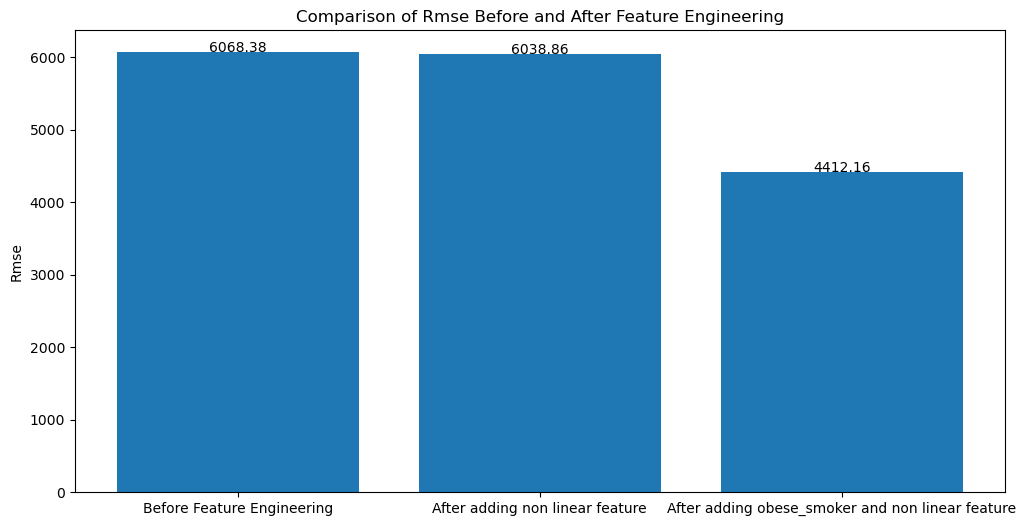

In [65]:
Rmse_results = [rmse_1, rmse_2, rmse_3]
labels = ['Before Feature Engineering', 'After adding non linear feature', 'After adding obese_smoker and non linear feature']
plt.figure(figsize=(12,6))
plt.bar(labels, Rmse_results)
for i in range(len(Rmse_results)):
    plt.text(i, Rmse_results[i], str(round(Rmse_results[i],2)), ha = 'center')
plt.ylabel('Rmse')
plt.title('Comparison of Rmse Before and After Feature Engineering')
plt.show()

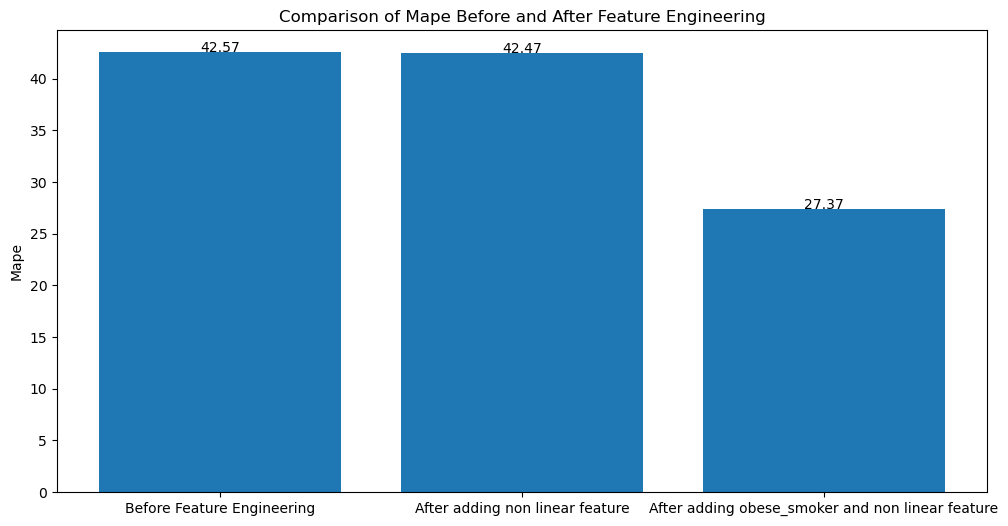

In [66]:
mape_results = [mape_1, mape_2, mape_3]
labels = ['Before Feature Engineering', 'After adding non linear feature', 'After adding obese_smoker and non linear feature']
plt.figure(figsize=(12,6))
plt.bar(labels, mape_results)
for i in range(len(mape_results)):
    plt.text(i, mape_results[i], str(round(mape_results[i],2)), ha = 'center')
plt.ylabel('Mape')
plt.title('Comparison of Mape Before and After Feature Engineering')
plt.show()

#### From the above graphs, we can see that the R2, RMSE and MAPE improved after adding the non linear feature and the obese_smoker feature.

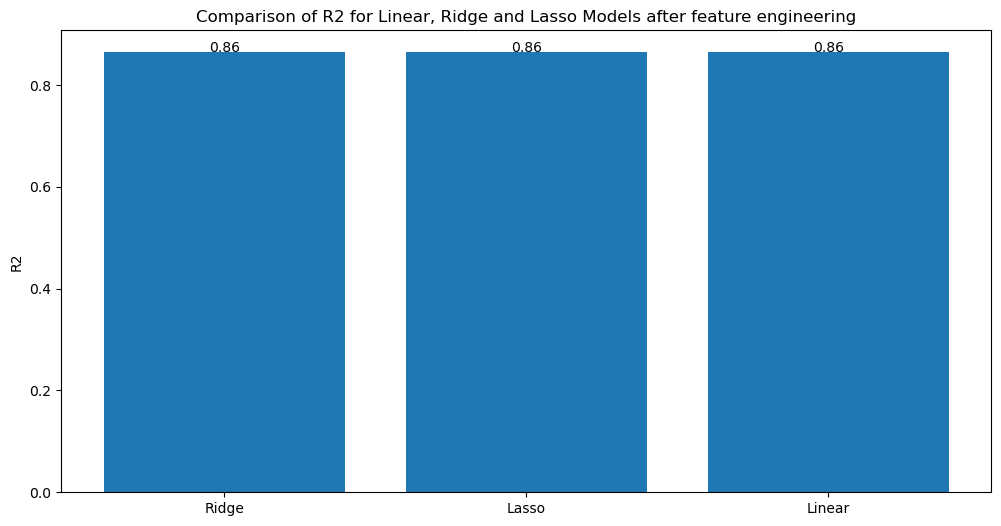

In [67]:
# comparing linear, ridge , and Lasso models using bar plots
R2_results = [r2_4, r2_5, r2_3]
labels = ['Ridge', 'Lasso', 'Linear']
plt.figure(figsize=(12,6))
plt.bar(labels, R2_results)
for i in range(len(R2_results)):
    plt.text(i, R2_results[i], str(round(R2_results[i],2)), ha = 'center')
plt.ylabel('R2')
plt.title('Comparison of R2 for Linear, Ridge and Lasso Models after feature engineering')
plt.show()

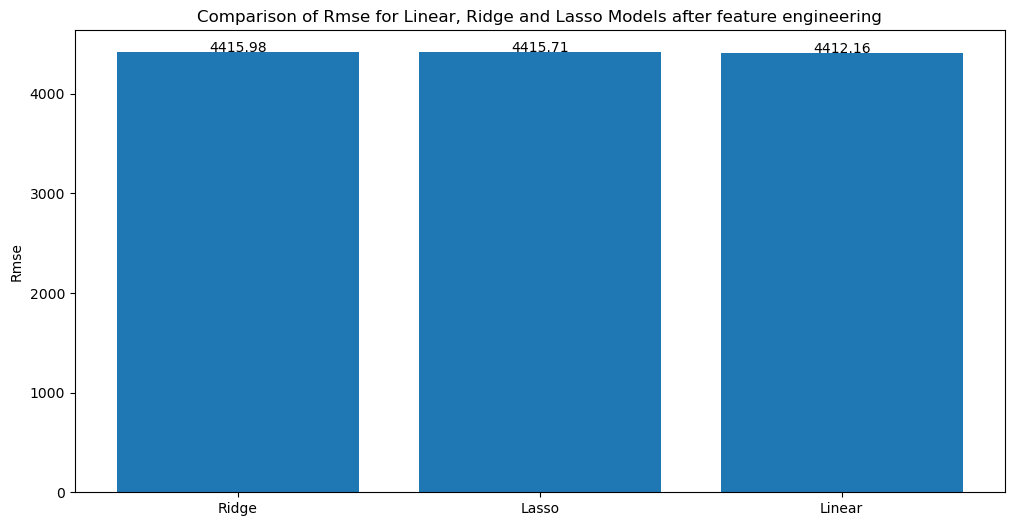

In [68]:
Rmse_results = [rmse_4, rmse_5, rmse_3]
labels = ['Ridge', 'Lasso', 'Linear']
plt.figure(figsize=(12,6))
plt.bar(labels, Rmse_results)
for i in range(len(Rmse_results)):
    plt.text(i, Rmse_results[i], str(round(Rmse_results[i],2)), ha = 'center')
plt.ylabel('Rmse')
plt.title('Comparison of Rmse for Linear, Ridge and Lasso Models after feature engineering')
plt.show()


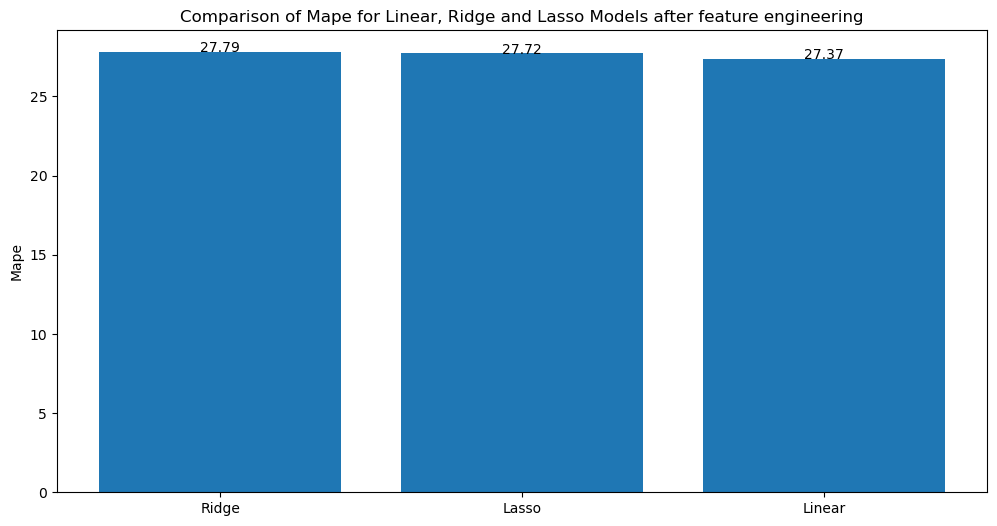

In [69]:
mape_results = [mape_4, mape_5, mape_3]
labels = ['Ridge', 'Lasso', 'Linear']
plt.figure(figsize=(12,6))
plt.bar(labels, mape_results)
for i in range(len(mape_results)):
    plt.text(i, mape_results[i], str(round(mape_results[i],2)), ha = 'center')
plt.ylabel('Mape')
plt.title('Comparison of Mape for Linear, Ridge and Lasso Models after feature engineering')
plt.show()

#### From the above results we can see that using Lasso and Ridge models isn't improving the performance of the linear model. 

<font size='6'><center>end of the notebook</center>